In [112]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import requests
import pandas as pd
import json
import numpy as np

In [113]:
player_id = 8478445

In [114]:
resp = requests.get("https://statsapi.web.nhl.com/api/v1/people/{}/stats?stats=gameLog".format(player_id))
data = resp.json()
#print(json.dumps(data['stats'][0]['splits'], indent=2))

In [115]:
splits = pd.read_json(json.dumps(data['stats'][0]['splits']))
games = pd.DataFrame(list(splits['game']))
gamePks = games['gamePk']
stats = pd.DataFrame(list(splits['stat']))
goals = stats['goals']
assists = stats['assists']
dates = splits['date']
df = pd.DataFrame(data={'gamePk': gamePks, 'goals': goals, 'assists': assists, 'date': dates})

In [116]:
df = df.sort_values(by='date')

In [121]:
df['csgoals'] = df['goals'].cumsum()
df['csassists'] = df['assists'].cumsum()
df['points'] = df['goals'].add(df['assists'])
df['cspoints'] = df['points'].cumsum()

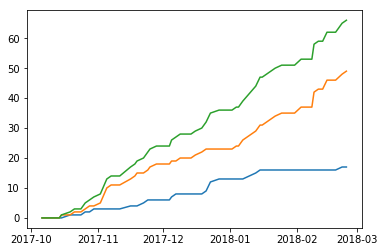

In [122]:
plt.plot(df['date'],df['csgoals'])
plt.plot(df['date'], df['csassists'])
plt.plot(df['date'], df['cspoints'])

0.2698412698412698

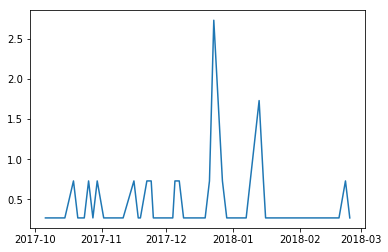

In [119]:
meangoals = df['goals'].mean()
plt.plot(df['date'], abs(df['goals'] - meangoals))
meangoals

(array([25.,  0., 24.,  0.,  6.,  0.,  5.,  0.,  0.,  3.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

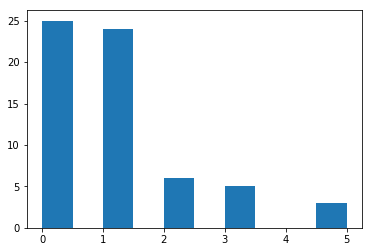

In [123]:
plt.hist(df['points'])